<a href="https://colab.research.google.com/github/gnbhub/gnbai20211/blob/master/week4/week4_changbeom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
col_names = ['x','y']
df = pd.read_csv('/content/data_lab1.txt', sep = " ", names = col_names)
x_train = df['x'].values.reshape(-1,1)
y_train = df['y'].values.reshape(-1,1)

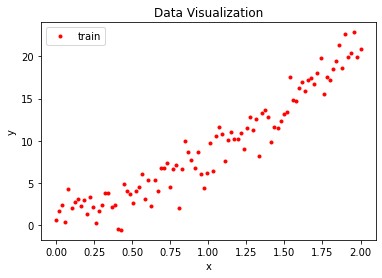

In [25]:
plt.plot(x_train, y_train, 'r.', label = 'train')

plt.title('Data Visualization')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [26]:
class LinearRegressor:

    def __init__(self, opt = 'bgd', lr = 0.001):
        self.opt = opt
        self.lr = lr
        self.weight = None
        self.history = []

    def fit(self, x, t, epochs = 200, print_step = 10):
        assert x.shape[0] == t.shape[0]
        assert len(x.shape) == 2

        self.num, self.dim = x.shape

        x = np.concatenate((np.ones(self.num, 1), x), axis =1)
        self.weight = np.random.randn(self.dim +1)

        for epoch in range(1, epochs +1):
            y = self.forward(x)
            self.backward(x,y,t)

            if epoch % print_step == 0:
                err = self.error(y,t)
                print(f'epoch: {epoch} sse: {err}')
                self.history.append(err)

    def forward (self,x):
        y = [self.pred(xi) for xi in x]

        return np.array(y).reshape(-1,1)

    def pred (self, xi):
        assert self.weight.shape == xi.shape

        return np.dot(self.weight, xi)

    def error(self,y,t):
        assert y.shape == t.shape

        return ((y-t)**2).sum() /2

    def backward(self, x, y,t):
        if self.opt == 'bgd':
            for n in range(self.dim+1):
                g = 0.
                for i in range(self.num):
                    g += (y[i] - t[i]) * x[i][n]
                self.weight[n] -= self.lr*g

        elif self.opt == 'sgd':
            for n in range (self.dim +1):
                i = np.random.randint(self.num)
                g = (y[i] - t[i]) * x[i][n]
                self.weight[n] -= slef.lr*g  

In [27]:
bgd = LinearRegressor(opt = 'bgd')

bgd.fit(x_train, y_train, epochs = 200)
print ('weight :', bgd.weight)

TypeError: ignored

In [ ]:
sgd = LinearRegressor(opt = 'sgd')

sgd.fit(x_train, t_train, epochs = 2000, print_step = 100)

print('weight:', sgd.weight)

In [ ]:
plt.plot(range(0, 200, 10)bgd.history, labe = 'bgd')
plt.plot(range(0,2000,100),sgd.history, lable = 'sgd')

plt.title('Error - BGD Vd SGD')
plt.legend()
plt.show()

print('Final error')
print('BGD:', bgd.history[-1])
print('SGD:', sgd.history[-1])

In [ ]:
def plot_line(w,x,label):
  y = [w[0] + w[1] *xi for xi in x]
  plt.plot(x,y,label = label)

In [ ]:
x = np.linsapce(0,2)

plt.plot(x_train, y_train, 'r.')
plot_line(bgd.weight, x, 'bgd')
plot_line(sgd.weight, x, 'sgd')

plt.legend()
plt.show()